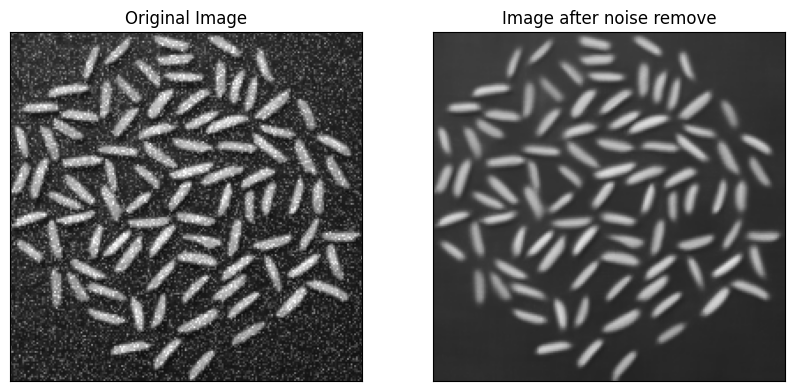

In [2]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

image = cv2.imread('rice_gaussian_noise.png') 
noise_removed_img =	cv2.fastNlMeansDenoising(image, None,40,7,21) 

images = [image, noise_removed_img]

titles = ['Original Image', 'Image after noise remove']

plt.figure(figsize=(10, 8))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

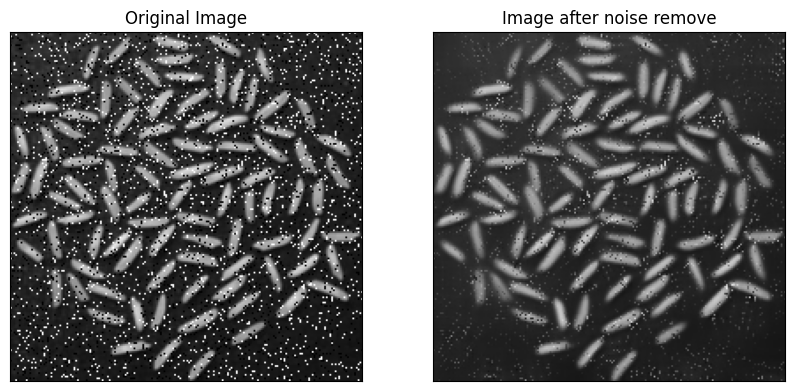

In [3]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 

image = cv2.imread('rice_salt_pepper_noise.png') 
noise_removed_img =	cv2.fastNlMeansDenoising(image, None,40,7,21) 

images = [image, noise_removed_img]

titles = ['Original Image', 'Image after noise remove']

plt.figure(figsize=(10, 8))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

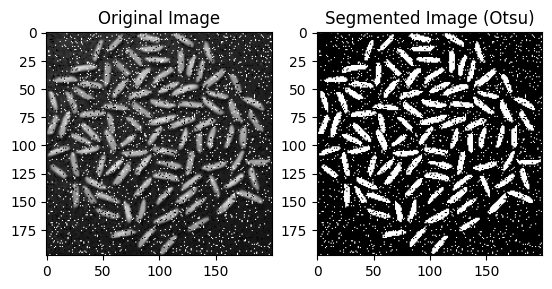

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread("rice_salt_pepper_noise.png", cv.IMREAD_GRAYSCALE)

_, binary_image = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(binary_image, cmap='gray'), plt.title('Segmented Image (Otsu)')
plt.show()


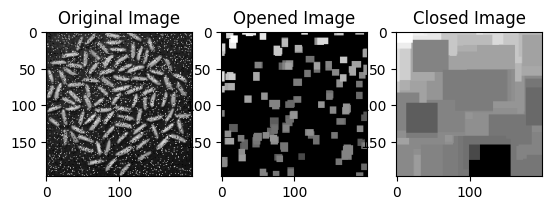

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread('rice_salt_pepper_noise.png', cv.IMREAD_GRAYSCALE)

kernel_open = np.ones((5, 5), np.uint8)
image_opened = cv.morphologyEx(image, cv.MORPH_OPEN, kernel_open, iterations=2)

kernel_close = np.ones((5, 5), np.uint8)
image_closed = cv.morphologyEx(image_opened, cv.MORPH_CLOSE, kernel_close, iterations=10)

plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(image_opened, cmap='gray'), plt.title('Opened Image')
plt.subplot(133), plt.imshow(image_closed, cmap='gray'), plt.title('Closed Image')
plt.show()

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)

denoised_im = cv.fastNlMeansDenoising(im, None, h=28, searchWindowSize=10)

_, segmented_image = cv.threshold(denoised_im, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

closed_image = cv.morphologyEx(segmented_image, cv.MORPH_CLOSE, kernel)

opened_image = cv.morphologyEx(closed_image, cv.MORPH_OPEN, kernel)

num_labels, labels = cv.connectedComponents(opened_image)

num_rice_grains = num_labels - 1

print('Number of rice grains : ', num_rice_grains)

Number of rice grains :  68
